**4. ¿Qué porcentaje de la actividad original de un radioisótopo permanece después de 5 vidas medias, 10 vidas medias? Realice una gráfica que indique su respuesta**

Supongamos una actividad de *1000* y una vida media de *0.025*. La actividad es:

Actividad en t=5*tau es: 6.737946999085467
Actividad en t=10*tau es: 0.04539992976248485


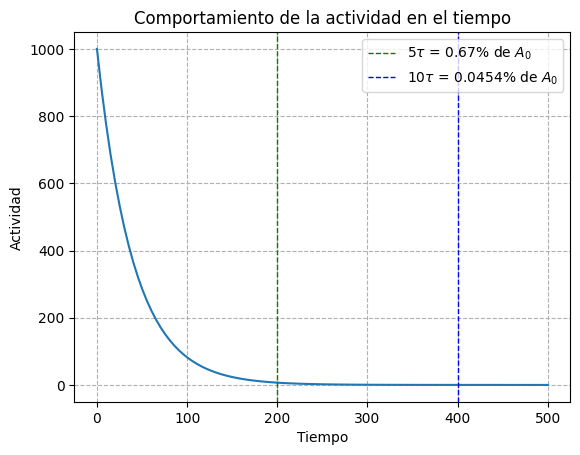

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 500, 100)
A0 = 1000
Lambda = 0.025
Tau = 1/Lambda

def A(t):
  return A0*np.exp(-Lambda*t)

print(f'Actividad en t=5*tau es: {A(5*Tau)}')
print(f'Actividad en t=10*tau es: {A(10*Tau)}')

plt.plot(t, A(t))
plt.axvline(5*Tau, color='green', linestyle='--', linewidth=1, label='5$\\tau$ = 0.67% de $A_0$')
plt.axvline(10*Tau, color='blue', linestyle='--', linewidth=1, label='10$\\tau$ = 0.0454% de $A_0$')
plt.title('Comportamiento de la actividad en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Actividad')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.savefig('Actividad_Equilibrio_Transitorio.jpg', dpi=300, bbox_inches='tight')
plt.show()

**10. Si inicialmente una fuente de 99Mo tiene una actividad de 10mCi, en el tiempo máximo de actividad del 99mTc, ¿qué actividad tendría? Grafique los decaimientos para 3 elusiones**

Núcleos iniciales primera elución: 1.15e+14
Núcleos iniciales segunda elución: 8.89e+13
Núcleos iniciales tercera elución: 6.88e+13


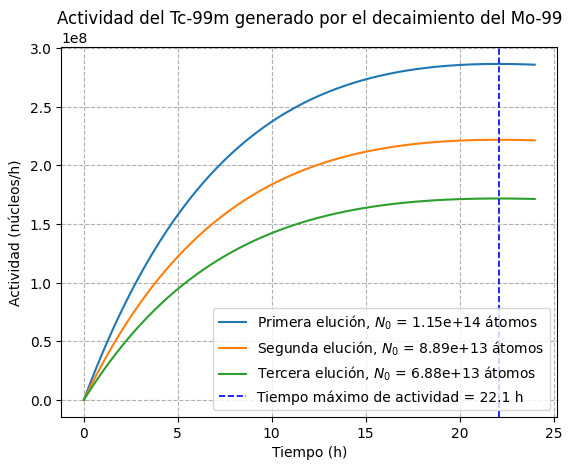

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 24, 1000)
Lambda_1 = 0.0116
Lambda_2 = 0.116

def N0(A_10,Lambda):
  return A_10/Lambda

def A2(t, N0, Lambda_1, Lambda_2):
  return N0*((Lambda_1*Lambda_2)/(Lambda_2-Lambda_1))*(np.exp(-Lambda_1*t)-np.exp(-Lambda_2*t))/3600

i = 0
A_0 = 3.7e8
tmax = 22.1
A = []
N_iniciales = []
while i<3:
  N_0 = N0(A_0, Lambda_1/3600)
  N_iniciales.append(N_0)
  A.append(A2(t, N_0, Lambda_1, Lambda_2))
  index = np.argmin(np.abs(t-tmax))
  A_0 = A[i][index]
  i+=1


#N_0 = N0(A_0, Lambda_1/3600)
#A = A2(t, N_0, Lambda_1, Lambda_2)
index = np.argmin(np.abs(t-tmax))
#print(f'Índice: {index}')
#print(f'Tiempo máximo: {t[index]:.2f}')
#print(f'Actividad máxima: {A[index]:.2e}')
#print(f'Núcleos iniciales: {N_0:.2e}')

print(f'Núcleos iniciales primera elución: {N_iniciales[0]:.2e}')
print(f'Núcleos iniciales segunda elución: {N_iniciales[1]:.2e}')
print(f'Núcleos iniciales tercera elución: {N_iniciales[2]:.2e}')

plt.plot(t, A[0], label='Primera elución, $N_0$ = 1.15e+14 átomos')
plt.plot(t, A[1], label='Segunda elución, $N_0$ = 8.89e+13 átomos')
plt.plot(t, A[2], label='Tercera elución, $N_0$ = 6.88e+13 átomos')
plt.axvline(tmax, color='blue', linestyle='--', linewidth=1.2, label='Tiempo máximo de actividad = 22.1 h')
plt.title('Actividad del Tc-99m generado por el decaimiento del Mo-99')
plt.grid(True, which="both", ls="--")
plt.xlabel('Tiempo (h)')
plt.ylabel('Actividad (núcleos/h)')
plt.legend()
plt.show()

**13. Dibuje una gráfica de la energía de ligadura por nucleón en función del número de masa para una gran cantidad de núcleos, con A entre 2 y 240. ¿Cómo se explica la región constante de B/A en el rango de A=30 y A=170, usando la propiedad de que la fuerza nuclear es de corto alcance?**

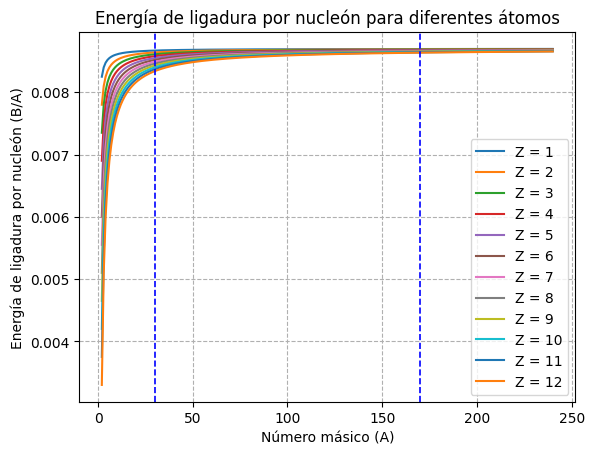

In [16]:
import numpy as np
import matplotlib.pyplot as plt

M_H = 1.0078
M_n = 1.0087
A = np.arange(2,241)

def BPN(A,Z):
  return (M_H-M_n)*Z/A + M_n - 1

for z in range(1,13):
  B_over_A = BPN(A,z)
  plt.plot(A, B_over_A, label=f'Z = {z}')
plt.axvline(30, color='blue', linestyle='--', linewidth=1.2)
plt.axvline(170, color='blue', linestyle='--', linewidth=1.2)
plt.title('Energía de ligadura por nucleón para diferentes átomos')
plt.grid(True, which="both", ls="--")
plt.xlabel('Número másico (A)')
plt.ylabel('Energía de ligadura por nucleón (B/A)')
plt.legend()
plt.show()

